## Conclusions

# Seasonal Temperature Trends : 
The data reveals a clear seasonal pattern in temperature, with temperatures starting to rise notably from April and declining from October onwards. This pattern underscores the seasonal variability in weather conditions throughout the year.

# Wind Conditions: 
Wind speeds, as depicted by the histogram, generally remain below 8 km/h, indicating predominantly calm wind conditions. Occasional spikes above this threshold suggest periods of increased wind activity.

# Prevalent Weather Types: 
The analysis shows that rainy and sunny weather conditions are the most frequently observed, with drizzle, rain, sun, snow, and fog occurring in varying frequencies. This distribution provides insights into the diversity of weather patterns recorded during the observation period.

# High-Rainfall Months: 
March, November, and December stand out as months with higher precipitation levels based on the data. This identification of high-rainfall periods can aid in seasonal planning and resource management.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [4]:
#checking the rows and columns of the above data
df.shape

(1461, 6)

In [5]:
#checking the null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
#checking the dupilicated values
df.duplicated().sum()

0

In [7]:
#Summary Statistics for Each Feature
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


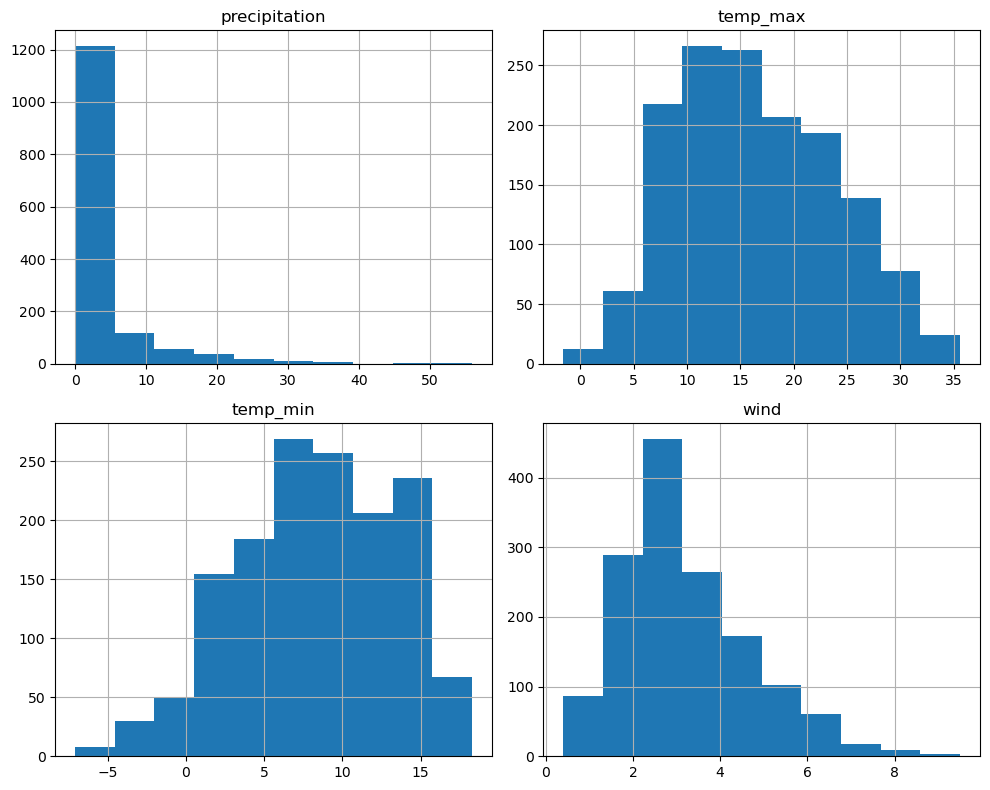

In [8]:
#Visualize the Distribution of Numerical Features
# Histograms
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

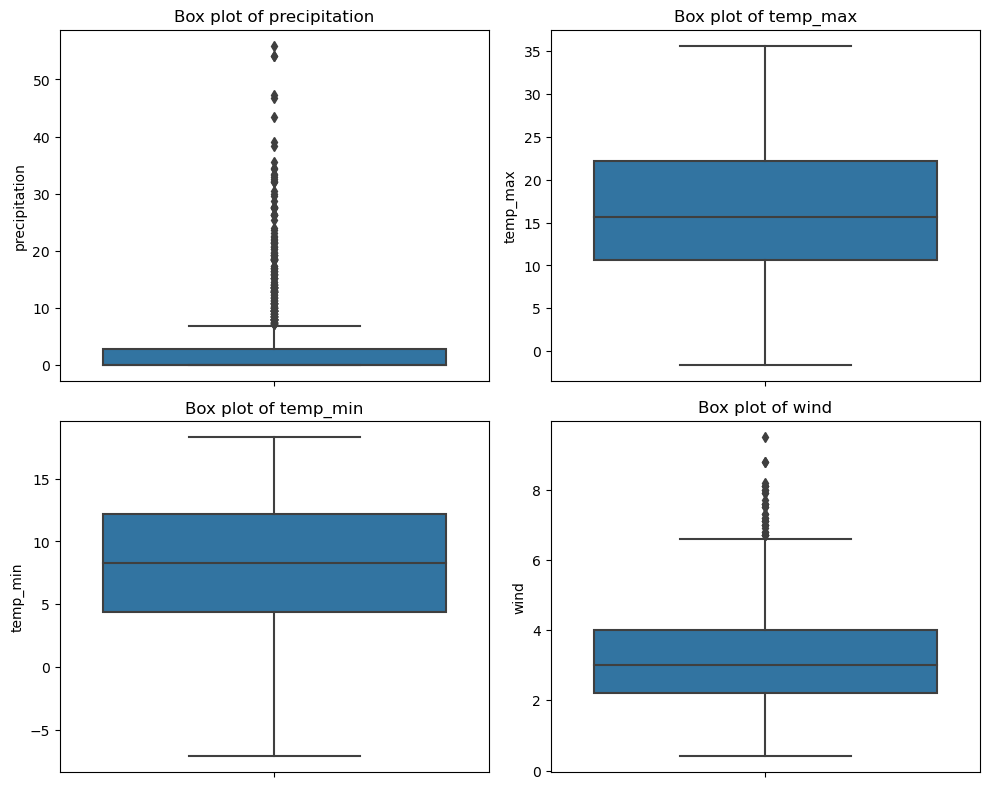

In [9]:
# Box plots
plt.figure(figsize=(10, 8))
for i, column in enumerate(['precipitation', 'temp_max', 'temp_min', 'wind'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [10]:
#Dealing with outliers with IQR for precipitation feature
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3 - Q1
IQR

2.8

In [11]:
#getting the lower and upper bound values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-4.199999999999999, 6.999999999999999)

In [12]:
#replacing the outliers with the nearest values
df['Precipitation'] = df['precipitation'].clip(lower=lower_bound, upper=upper_bound)

In [13]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Precipitation
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle,0.0
1,02-01-2012,10.9,10.6,2.8,4.5,rain,7.0
2,03-01-2012,0.8,11.7,7.2,2.3,rain,0.8
3,04-01-2012,20.3,12.2,5.6,4.7,rain,7.0
4,05-01-2012,1.3,8.9,2.8,6.1,rain,1.3


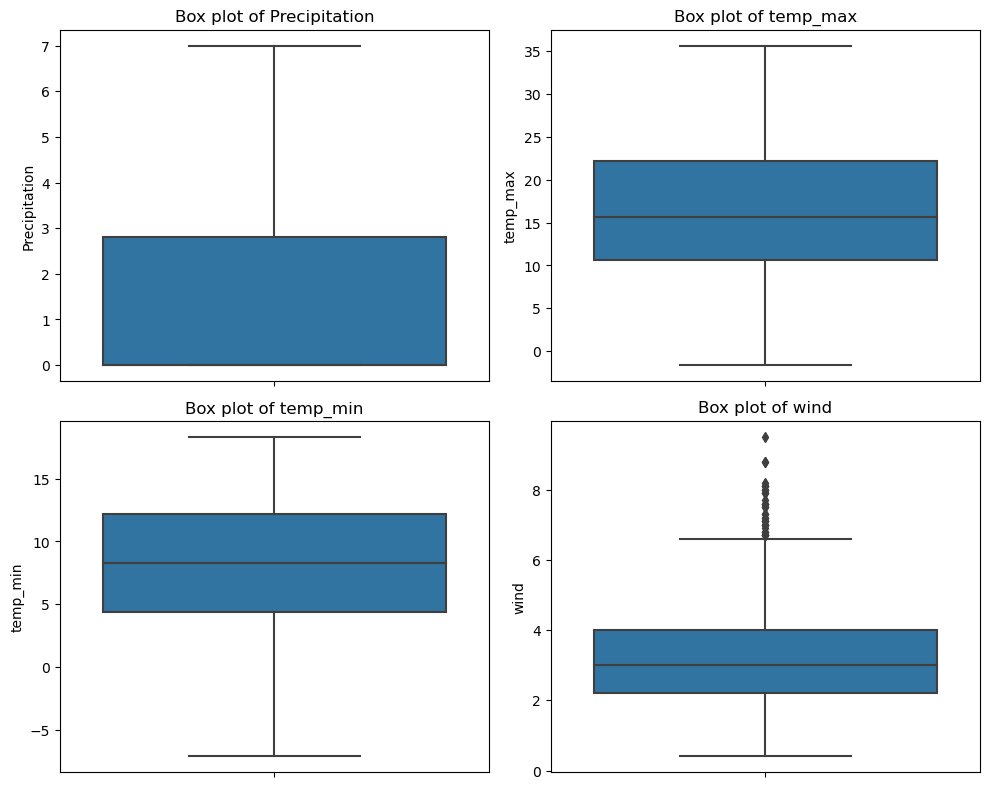

In [14]:
# Box plots
plt.figure(figsize=(10, 8))
for i, column in enumerate(['Precipitation', 'temp_max', 'temp_min', 'wind'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

In [15]:
df['Date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

In [16]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Precipitation,Date
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle,0.0,2012-01-01
1,02-01-2012,10.9,10.6,2.8,4.5,rain,7.0,2012-01-02
2,03-01-2012,0.8,11.7,7.2,2.3,rain,0.8,2012-01-03
3,04-01-2012,20.3,12.2,5.6,4.7,rain,7.0,2012-01-04
4,05-01-2012,1.3,8.9,2.8,6.1,rain,1.3,2012-01-05


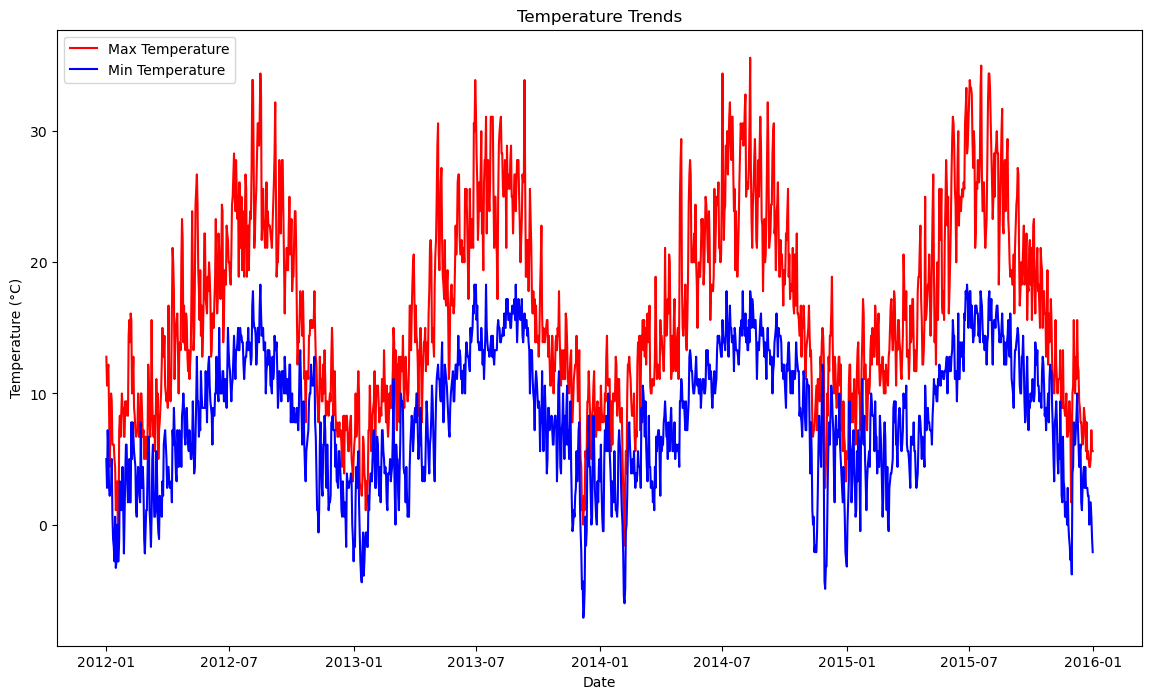

In [17]:
# Plotting 
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['temp_max'], label='Max Temperature', color='r')
plt.plot(df['Date'], df['temp_min'], label='Min Temperature', color='b')
plt.title('Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [18]:
# Extract month and quarter for seasonal analysis
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter


In [19]:
#converting numerical month numbers into month names
df['Month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [20]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,Precipitation,Date,month,quarter,Month
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle,0.0,2012-01-01,1,1,January
1,02-01-2012,10.9,10.6,2.8,4.5,rain,7.0,2012-01-02,1,1,January
2,03-01-2012,0.8,11.7,7.2,2.3,rain,0.8,2012-01-03,1,1,January
3,04-01-2012,20.3,12.2,5.6,4.7,rain,7.0,2012-01-04,1,1,January
4,05-01-2012,1.3,8.9,2.8,6.1,rain,1.3,2012-01-05,1,1,January


In [21]:
#removing the extra features
columns_to_drop = ['precipitation', 'month', 'date']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,temp_max,temp_min,wind,weather,Precipitation,Date,quarter,Month
0,12.8,5.0,4.7,drizzle,0.0,2012-01-01,1,January
1,10.6,2.8,4.5,rain,7.0,2012-01-02,1,January
2,11.7,7.2,2.3,rain,0.8,2012-01-03,1,January
3,12.2,5.6,4.7,rain,7.0,2012-01-04,1,January
4,8.9,2.8,6.1,rain,1.3,2012-01-05,1,January


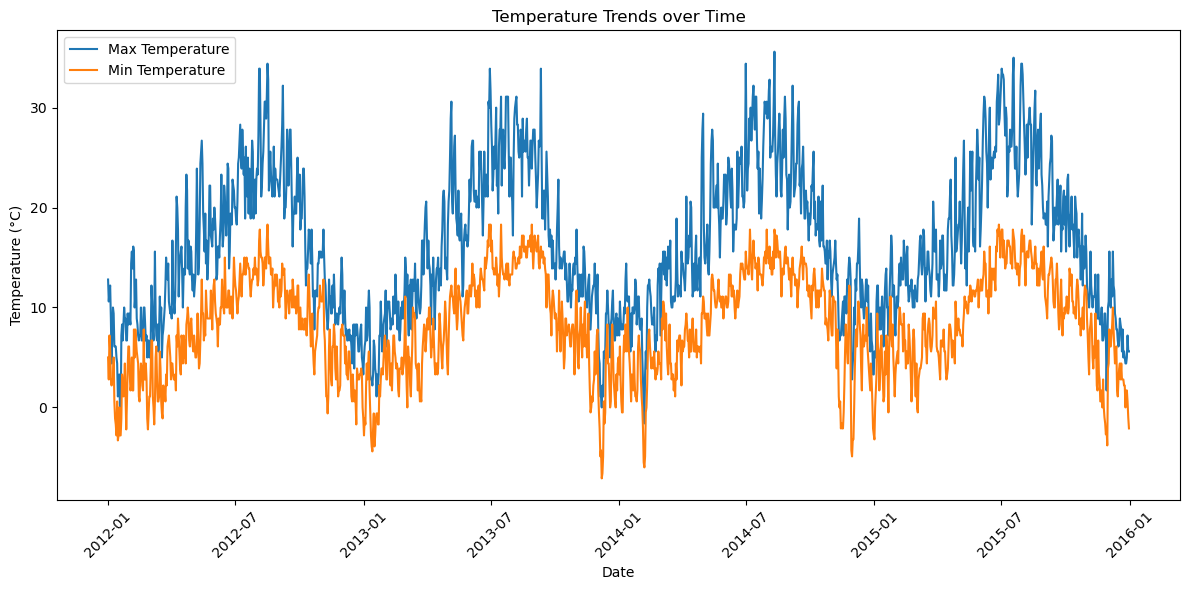

In [22]:
#Visualize Insights
#Temperature Trends (temp_max, temp_min)
# Line plot for temperature trends according to date
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['temp_max'], label='Max Temperature')
plt.plot(df['Date'], df['temp_min'], label='Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

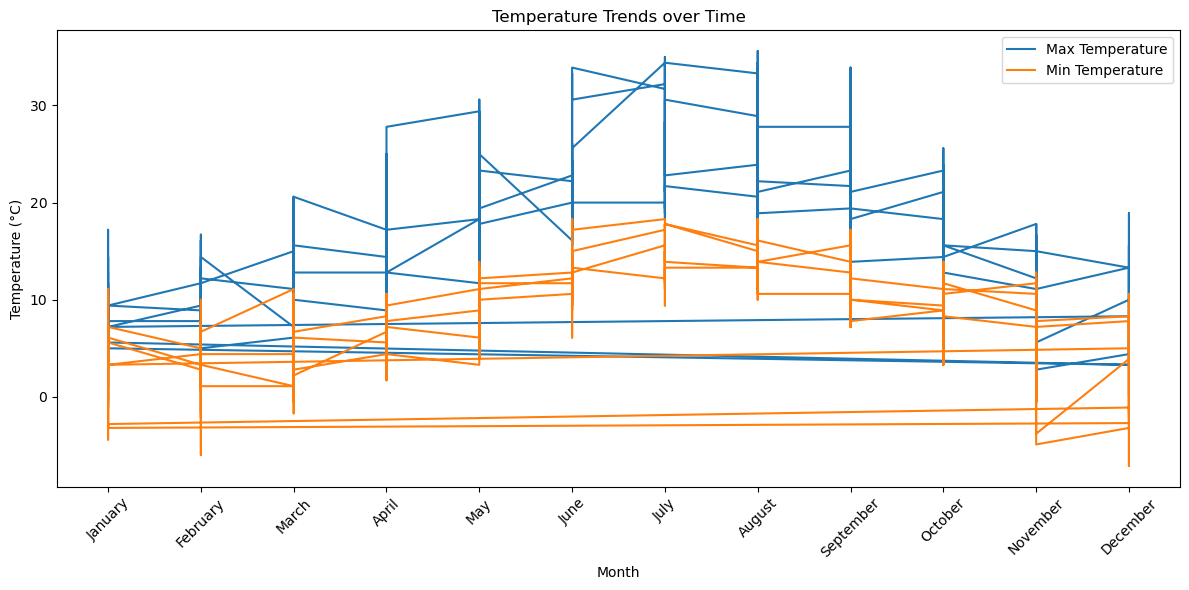

In [23]:
# Line plot for temperature trends according to Month
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['temp_max'], label='Max Temperature')
plt.plot(df['Month'], df['temp_min'], label='Min Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights 

The line plot illustrates the seasonal variation in maximum and minimum temperatures across the months. It reveals a distinct trend where temperatures begin to rise from April and decline from October, reflecting typical seasonal temperature patterns.

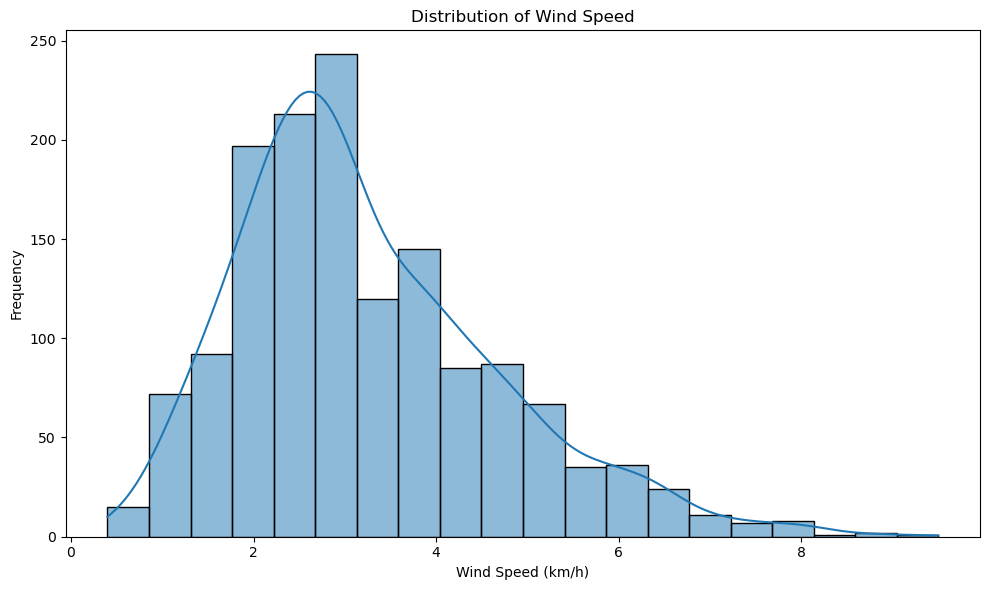

In [24]:
# Distribution of wind speeds
plt.figure(figsize=(10, 6))
sns.histplot(df['wind'], bins=20, kde=True)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.tight_layout()
plt.show()

# Insights
The histogram provides a clear distribution of wind speeds, highlighting conditions where wind speeds exceed 8 km/h. This visualization offers valuable insights into prevailing wind conditions.

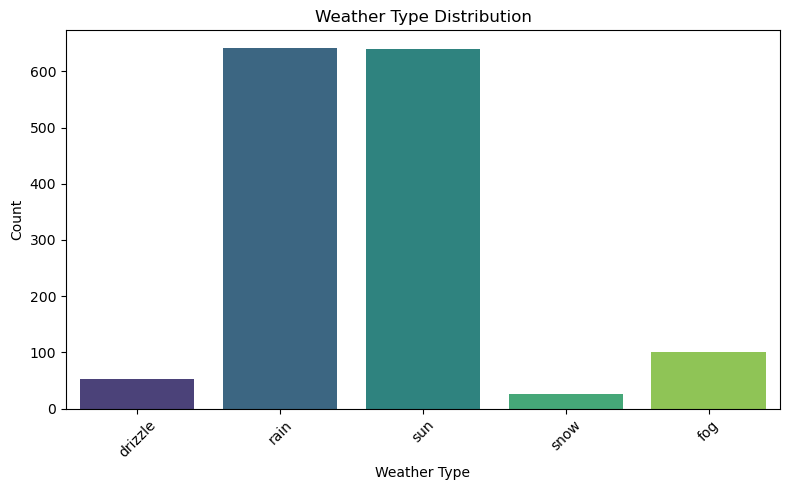

In [25]:
# Count of different weather types
plt.figure(figsize=(8, 5))
sns.countplot(x='weather', data=df, palette='viridis')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.title('Weather Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights: 
The count plot depicts the occurrence frequency of various weather types such as drizzle, rain, sun, snow, and fog. It indicates that rainy and sunny weather conditions are the most frequent occurrences based on the data.

C:\Users\Lenovo\anaconda3\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\Lenovo\anaconda3\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


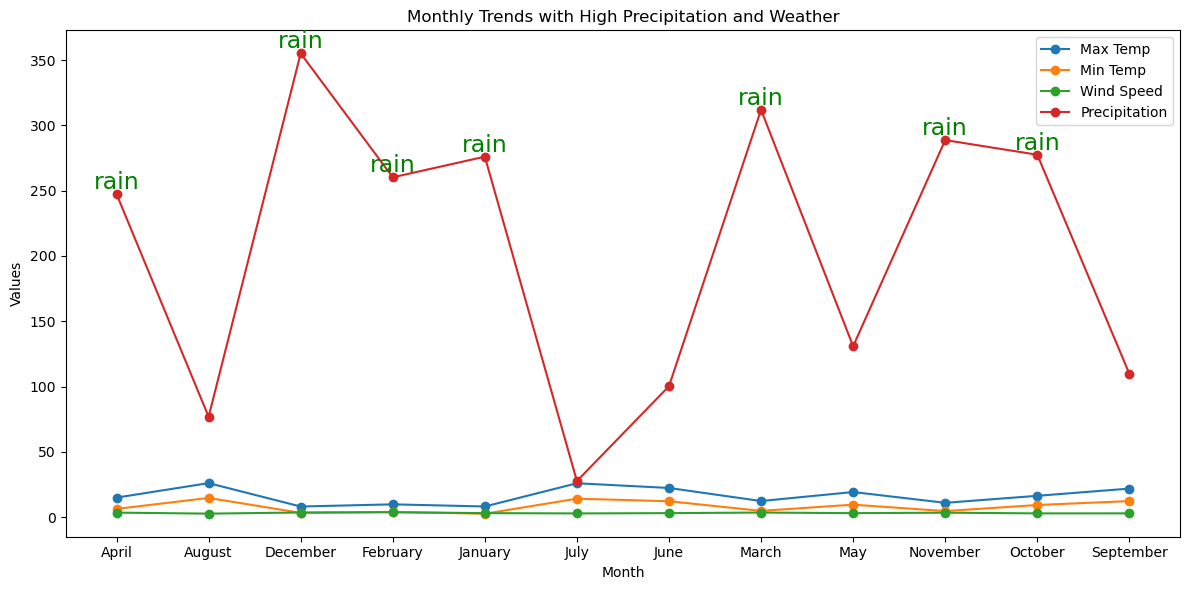

In [26]:
#Monthly analysis
monthly_stats = df.groupby('Month').agg({
    'temp_max': 'mean',       # Mean temperature
    'temp_min': 'mean',       # Mean temperature
    'wind': 'mean',           # Mean wind speed
    'Precipitation': 'sum',   # Total precipitation
    'weather': lambda x: x.mode()[0]  # Most frequent weather type
}).reset_index()

# Identify months with high precipitation
high_precip_months = monthly_stats[monthly_stats['Precipitation'] > monthly_stats['Precipitation'].mean()]

# Plotting monthly trends including precipitation and weather
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['Month'], monthly_stats['temp_max'], marker='o', label='Max Temp')
plt.plot(monthly_stats['Month'], monthly_stats['temp_min'], marker='o', label='Min Temp')
plt.plot(monthly_stats['Month'], monthly_stats['wind'], marker='o', label='Wind Speed')
plt.plot(monthly_stats['Month'], monthly_stats['Precipitation'], marker='o', label='Precipitation')

# Highlight months with high precipitation and their weather
for month in high_precip_months['Month']:
    plt.text(month, monthly_stats.loc[monthly_stats['Month'] == month, 'Precipitation'], 
             f"{monthly_stats.loc[monthly_stats['Month'] == month, 'weather'].values[0]}",
             ha='center', va='bottom', fontsize=17, color='green')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Trends with High Precipitation and Weather')
plt.xticks(monthly_stats['Month'])
plt.legend()
plt.tight_layout()
plt.show()

# Insights 
Based on the insights gathered, it is evident that March, November, and December experience higher levels of rainfall compared to other months.
 